# Instantiating a small convnet

In [2]:
from tensorflow.keras import models, layers

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


# Adding a classifier on top of the convnet

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
__________

# Training the convnet on MNIST images

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [11]:
import matplotlib.pyplot as plt

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

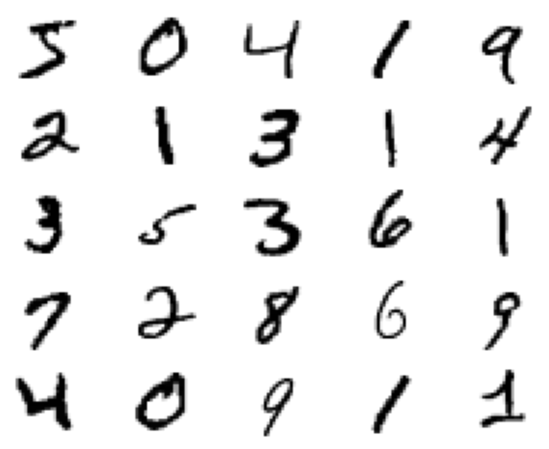

In [25]:
fig, axes = plt.subplots(5,5, figsize=(10, 8),subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(wspace=0.1, hspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i],cmap='binary')
    for j in ax.spines.values():
        j.set_visible(False) # take a view of the data

In [27]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [30]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


2022-09-08 20:02:20.208492: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


60000/60000 [==============================] - 24s 393us/step - loss: 1.6093 - acc: 0.4309
Epoch 2/5
60000/60000 [==============================] - 24s 394us/step - loss: 0.3910 - acc: 0.8795
Epoch 3/5
60000/60000 [==============================] - 24s 393us/step - loss: 0.1861 - acc: 0.9426
Epoch 4/5
60000/60000 [==============================] - 23s 387us/step - loss: 0.1168 - acc: 0.9635
Epoch 5/5
60000/60000 [==============================] - 23s 379us/step - loss: 0.0870 - acc: 0.9724


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 122us/step


In [35]:
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}') # the accuracy is quite high

test_loss: 0.4331089536213956
test_acc: 0.9725


# max-pooling operation

In [37]:
model_no_max_pooling = models.Sequential()
model_no_max_pooling.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pooling.add(layers.Conv2D(64, (3,3), activation='relu'))
model_no_max_pooling.add(layers.Conv2D(64, (3,3), activation='relu'))
model_no_max_pooling.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [38]:
import os, shutil